<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_2X/blob/main/GQtest_groupwise_(y_hat)_0_3_0_7_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_2X/groupwise_0.3_0.7'

In [4]:
os.listdir(base_path)

['data_groupwise_0.3_0.7_n250.csv',
 'data_groupwise_0.3_0.7_n120.csv',
 'data_groupwise_0.3_0.7_n60.csv',
 'data_groupwise_0.3_0.7_n30.csv',
 'data_groupwise_0.3_0.7_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.773755,63.026792,0.192169,166.992716,166.710567,0.282150
1,0.0,1.0,31.139984,90.801210,-0.153276,131.787918,131.953983,-0.166064
2,0.0,2.0,70.668177,50.130743,-1.035382,129.763538,130.725523,-0.961985
3,0.0,3.0,54.323744,64.680793,0.179655,129.184192,128.964687,0.219504
4,0.0,4.0,94.833967,92.592792,-0.033749,197.393010,197.362721,0.030289
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,52.148627,45.713883,1.163643,109.026154,107.883057,1.143097
249996,999.0,246.0,30.978470,74.798423,-0.763519,115.013374,115.699608,-0.686233
249997,999.0,247.0,88.043661,66.637096,0.676875,165.357632,164.775786,0.581846
249998,999.0,248.0,51.997319,97.856215,-0.802287,159.051247,159.805802,-0.754556


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.773755,63.026792,0.192169,166.992716,166.710567,0.282150
1,0.0,1.0,31.139984,90.801210,-0.153276,131.787918,131.953983,-0.166064
2,0.0,2.0,70.668177,50.130743,-1.035382,129.763538,130.725523,-0.961985
3,0.0,3.0,54.323744,64.680793,0.179655,129.184192,128.964687,0.219504
4,0.0,4.0,94.833967,92.592792,-0.033749,197.393010,197.362721,0.030289
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,52.148627,45.713883,1.163643,109.026154,107.883057,1.143097
249996,999.0,246.0,30.978470,74.798423,-0.763519,115.013374,115.699608,-0.686233
249997,999.0,247.0,88.043661,66.637096,0.676875,165.357632,164.775786,0.581846
249998,999.0,248.0,51.997319,97.856215,-0.802287,159.051247,159.805802,-0.754556


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.773755  63.026792  0.192169  166.992716  166.710567  0.282150
      1.0    31.139984  90.801210 -0.153276  131.787918  131.953983 -0.166064
      2.0    70.668177  50.130743 -1.035382  129.763538  130.725523 -0.961985
      3.0    54.323744  64.680793  0.179655  129.184192  128.964687  0.219504
      4.0    94.833967  92.592792 -0.033749  197.393010  197.362721  0.030289
...                ...        ...       ...         ...         ...       ...
999.0 245.0  52.148627  45.713883  1.163643  109.026154  107.883057  1.143097
      246.0  30.978470  74.798423 -0.763519  115.013374  115.699608 -0.686233
      247.0  88.043661  66.637096  0.676875  165.357632  164.775786  0.581846
      248.0  51.997319  97.856215 -0.802287  159.051247  159.805802 -0.754556
      249.0  67.611130  83.988624 -0.071032  161.528722  161.614309 -0.085587

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.773755  63.026792  0.192169  166.992716  166.710567  0.282150
      1.0    31.139984  90.801210 -0.153276  131.787918  131.953983 -0.166064
      2.0    70.668177  50.130743 -1.035382  129.763538  130.725523 -0.961985
      3.0    54.323744  64.680793  0.179655  129.184192  128.964687  0.219504
      4.0    94.833967  92.592792 -0.033749  197.393010  197.362721  0.030289
...                ...        ...       ...         ...         ...       ...
999.0 245.0  52.148627  45.713883  1.163643  109.026154  107.883057  1.143097
      246.0  30.978470  74.798423 -0.763519  115.013374  115.699608 -0.686233
      247.0  88.043661  66.637096  0.676875  165.357632  164.775786  0.581846
      248.0  51.997319  97.856215 -0.802287  159.051247  159.805802 -0.754556
      249.0  67.611130  83.988624 -0.071032  161.528722  161.614309 -0.085587

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.773755,63.026792,0.192169,166.992716,166.710567,0.282150
1,0.0,1.0,31.139984,90.801210,-0.153276,131.787918,131.953983,-0.166064
2,0.0,2.0,70.668177,50.130743,-1.035382,129.763538,130.725523,-0.961985
3,0.0,3.0,54.323744,64.680793,0.179655,129.184192,128.964687,0.219504
4,0.0,4.0,94.833967,92.592792,-0.033749,197.393010,197.362721,0.030289
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,52.148627,45.713883,1.163643,109.026154,107.883057,1.143097
249996,999.0,246.0,30.978470,74.798423,-0.763519,115.013374,115.699608,-0.686233
249997,999.0,247.0,88.043661,66.637096,0.676875,165.357632,164.775786,0.581846
249998,999.0,248.0,51.997319,97.856215,-0.802287,159.051247,159.805802,-0.754556


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.773755  63.026792  0.192169  166.992716  166.710567  0.282150
      1.0    31.139984  90.801210 -0.153276  131.787918  131.953983 -0.166064
      2.0    70.668177  50.130743 -1.035382  129.763538  130.725523 -0.961985
      3.0    54.323744  64.680793  0.179655  129.184192  128.964687  0.219504
      4.0    94.833967  92.592792 -0.033749  197.393010  197.362721  0.030289
...                ...        ...       ...         ...         ...       ...
999.0 245.0  52.148627  45.713883  1.163643  109.026154  107.883057  1.143097
      246.0  30.978470  74.798423 -0.763519  115.013374  115.699608 -0.686233
      247.0  88.043661  66.637096  0.676875  165.357632  164.775786  0.581846
      248.0  51.997319  97.856215 -0.802287  159.051247  159.805802 -0.754556
      249.0  67.611130  83.988624 -0.071032  161.528722  161.614309 -0.085587

[250000 rows x 6 columns]

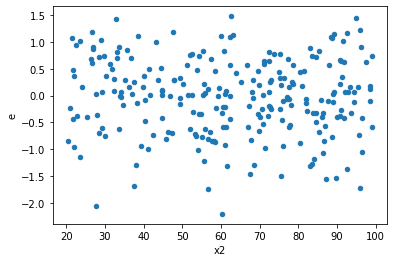

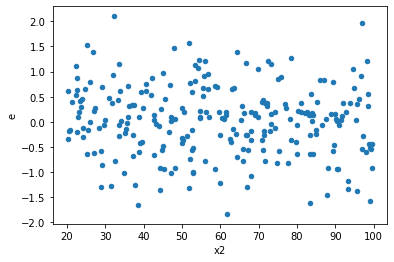

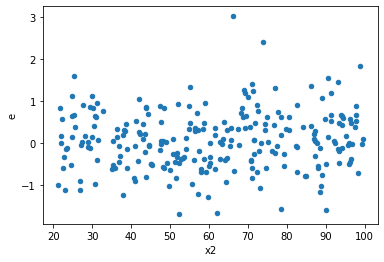

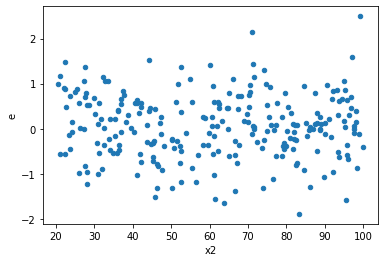

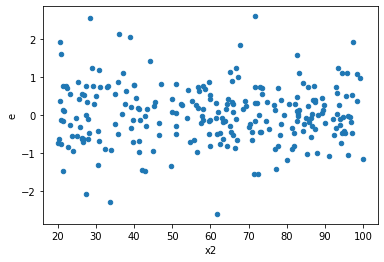

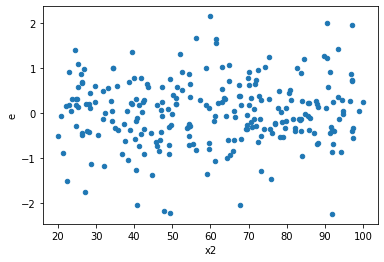

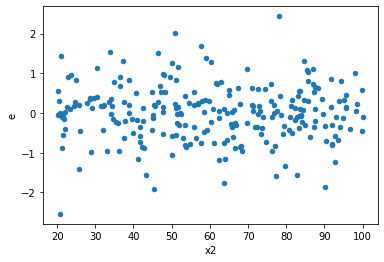

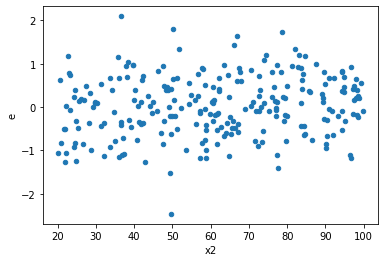

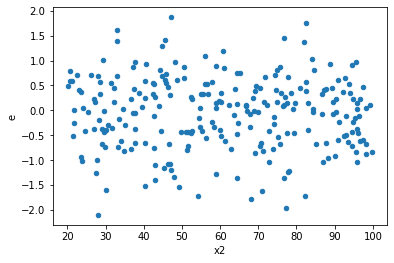

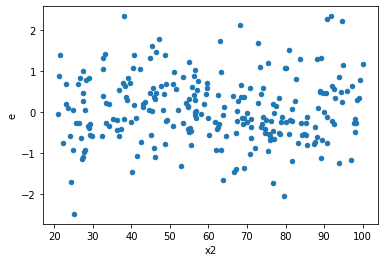

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,98.0,98.0,47.24498604800137,56.80688403781667,0.48209169436736093,0.5796620820185375,1.2023896880845795,0.363177318568368,0.818411340715816,0.181588659284184,Reject005=1 : Homoscedasticity
2.0,98.0,98.0,41.55478645506238,45.992361766479775,0.42402843321492223,0.46930981394367116,1.106788548082571,0.6164923517710441,0.6917538241144779,0.30824617588552206,Reject005=1 : Homoscedasticity
3.0,98.0,98.0,44.393228704160165,50.50501476227679,0.4529921296342874,0.5153572934926203,1.1376738353239866,0.5243854174761025,0.7378072912619488,0.26219270873805123,Reject005=1 : Homoscedasticity
4.0,98.0,98.0,41.314452607270105,52.90944248370624,0.42157604701296025,0.5398922702419005,1.2806521482120707,0.22255998299080115,0.8887200085045994,0.11127999149540058,Reject005=1 : Homoscedasticity
5.0,98.0,98.0,41.13482672989665,45.41645971600149,0.4197431298969046,0.4634332624081785,1.104087784645826,0.6250023615050744,0.6874988192474628,0.3125011807525372,Reject005=1 : Homoscedasticity
8.0,98.0,98.0,45.54873843567595,49.608927342653075,0.4647830452619995,0.5062135443127865,1.0891394371484282,0.673384322818442,0.663307838590779,0.336692161409221,Reject005=1 : Homoscedasticity
9.0,98.0,98.0,44.60879652559587,73.87259448041786,0.45519180128159054,0.7538019844940598,1.6560095818328309,0.013235686218042053,0.993382156890979,0.006617843109021027,Reject005=0 : Heteroscedasticity
12.0,98.0,98.0,37.08408106976868,47.97725249309287,0.37840899050784366,0.48956380094992724,1.2937425199462316,0.20417002430472087,0.8979149878476396,0.10208501215236043,Reject005=1 : Homoscedasticity
13.0,98.0,98.0,49.062142934680374,51.79349561452514,0.5006341115783711,0.5285050572910729,1.0556712878090384,0.789113280673257,0.6054433596633715,0.3945566403366285,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,52.588267491211184,50.7750466495838,0.5366149744001141,0.5181127209141204,0.9655204301619099,0.8624707130070529,Reject005=1 : Homoscedasticity
1.0,98.0,98.0,47.24498604800137,56.80688403781667,0.48209169436736093,0.5796620820185375,1.2023896880845795,0.363177318568368,Reject005=1 : Homoscedasticity
2.0,98.0,98.0,41.55478645506238,45.992361766479775,0.42402843321492223,0.46930981394367116,1.106788548082571,0.6164923517710441,Reject005=1 : Homoscedasticity
3.0,98.0,98.0,44.393228704160165,50.50501476227679,0.4529921296342874,0.5153572934926203,1.1376738353239866,0.5243854174761025,Reject005=1 : Homoscedasticity
4.0,98.0,98.0,41.314452607270105,52.90944248370624,0.42157604701296025,0.5398922702419005,1.2806521482120707,0.22255998299080115,Reject005=1 : Homoscedasticity
5.0,98.0,98.0,41.13482672989665,45.41645971600149,0.4197431298969046,0.4634332624081785,1.104087784645826,0.6250023615050744,Reject005=1 : Homoscedasticity
6.0,98.0,98.0,59.55336397740383,39.94493399305981,0.6076873875245289,0.40760136727612056,0.6707418578103499,0.0493827794032793,Reject005=0 : Heteroscedasticity
7.0,98.0,98.0,43.37748848293483,31.58966674043686,0.442627433499335,0.3223435381677231,0.7282502478875553,0.1182020287209943,Reject005=1 : Homoscedasticity
8.0,98.0,98.0,45.54873843567595,49.608927342653075,0.4647830452619995,0.5062135443127865,1.0891394371484282,0.673384322818442,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      930
Reject005=0 : Heteroscedasticity     70
Name: Result_test, dtype: int64